In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#IMDB RATINGS

imdb_ratings = pd.read_csv('imdb.title.ratings.csv')
imdb_ratings.head(2)

#IMDB DATA WITH MOVIE TITLE AND GENRES

imdb_title = pd.read_csv('imdb.title.basics.csv.gz')
#Dropping original_title and keeping the primary title as the main title

imdb_title.drop(['original_title', 'start_year', 'start_year'] , axis = 1, inplace = True)
imdb_title.head(2)


,tconst,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"


In [12]:
joined_imdb = imdb_ratings.set_index('tconst').join(imdb_title.set_index('tconst'), on = 'tconst', how = 'inner')


#Dropped missing values in the genres column
joined_imdb.dropna(subset = ['genres'], axis = 0, inplace = True)


#Filling runtime_minutes column missing values with the columns mean value
joined_imdb['runtime_minutes'].fillna(value = joined_imdb['runtime_minutes'].mean(), inplace = True)
joined_imdb.head(2)

,averagerating,numvotes,primary_title,runtime_minutes,genres
tconst,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,117.0,Romance
tt10384606,8.9,559,Borderless,87.0,Documentary


In [1118]:
joined_imdb.sort_values(by = 'averagerating', ascending = False)

,averagerating,numvotes,primary_title,runtime_minutes,genres
tconst,,,,,
tt4109192,10.0,6,I Was Born Yesterday!,31.000000,Documentary
tt5390098,10.0,5,The Paternal Bond: Barbary Macaques,59.000000,Documentary
tt4944240,10.0,5,Dog Days in the Heartland,94.732273,Drama
tt5089804,10.0,7,Fly High: Story of the Disc Dog,65.000000,Documentary
tt4960818,10.0,8,Revolution Food,70.000000,Documentary
...,...,...,...,...,...
tt4837074,1.0,174,Ritoru Kyouta no bouken,82.000000,Adventure
tt2125489,1.0,21,Denpo-biyori,94.732273,Drama
tt2124890,1.0,439,Ramo Trip,119.000000,Documentary


In [14]:
u = str(set(list(joined_imdb['genres'])))
u.count('Drama')

215

In [15]:
u = str(set(list(joined_imdb['genres'])))
u.count('Comedy')

185

In [916]:
u = str(set(list(joined_imdb['genres'])))
u.count('Documentary')

173

In [917]:
u = str(set(list(joined_imdb['genres'])))
u.count('Music')

167

In [918]:
u = str(set(list(joined_imdb['genres'])))
u.count('Action')

153

In [919]:
u = str(set(list(joined_imdb['genres'])))
u.count('Horror')

125

In [920]:
u = str(set(list(joined_imdb['genres'])))
u.count('Family')

121

In [921]:
u = str(set(list(joined_imdb['genres'])))
u.count('Thriller')

127

In [922]:
u = str(set(list(joined_imdb['genres'])))
u.count('Crime')

116

In [923]:
u = str(set(list(joined_imdb['genres'])))
u.count('Animation')

113

Text(0.5, 0, 'Number of Movies')

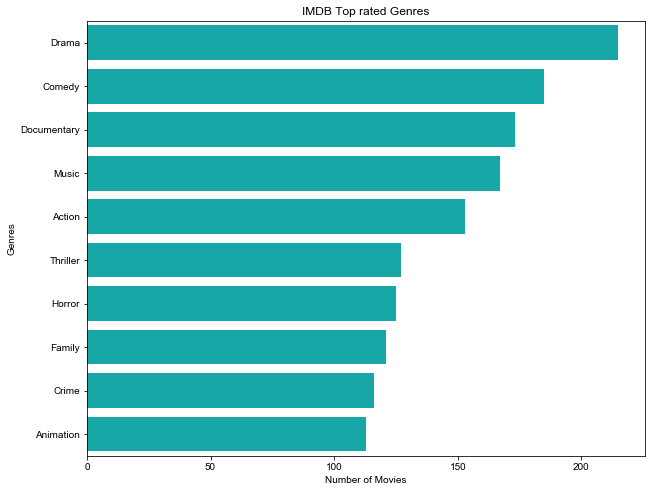

In [16]:
plt.figure(figsize=(10,8))
y = [ 'Drama', 'Comedy', 'Documentary', 'Music', 'Action', 'Thriller', 'Horror', 'Family', 'Crime','Animation']
x = [215, 185, 173, 167, 153, 127, 125, 121, 116, 113]
sns.barplot(x, y, color = 'c')
plt.title('IMDB Top rated Genres')
plt.ylabel('Genres')
sns.set(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=2)
plt.xlabel('Number of Movies')


In [925]:
joined_imdb.runtime_minutes.describe()

count    73052.000000
mean        94.732273
std        198.591839
min          3.000000
25%         83.000000
50%         93.000000
75%        102.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [23]:
joined_imdb.head(2)

,averagerating,numvotes,primary_title,runtime_minutes,genres
tconst,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,117.0,Romance
tt10384606,8.9,559,Borderless,87.0,Documentary


Text(0.5, 0, 'rating')

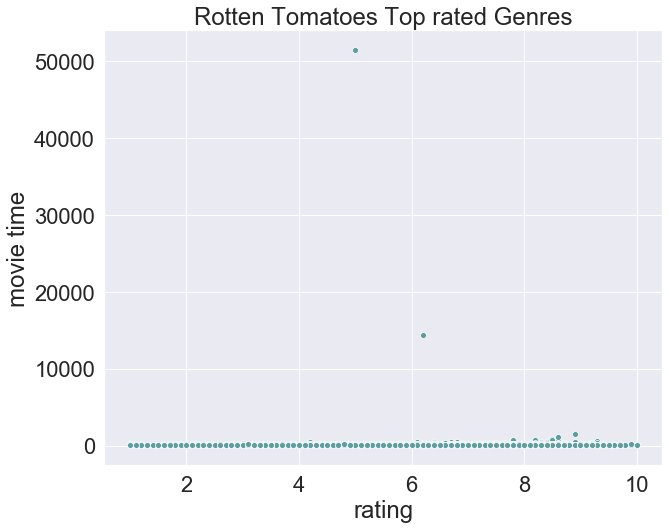

In [24]:

x = joined_imdb.averagerating
y= joined_imdb.runtime_minutes
plt.figure(figsize=(10,8))
sns.scatterplot(x, y, color = 'cadetblue')
plt.title('Rotten Tomatoes Top rated Genres')
plt.ylabel('movie time')
sns.set(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=2)
plt.xlabel('rating')

In [1147]:
#ax.scatter(boston_df['INDUS'], boston_df['TAX'])

In [929]:
joined_imdb.runtime_minutes.describe()

count    73052.000000
mean        94.732273
std        198.591839
min          3.000000
25%         83.000000
50%         93.000000
75%        102.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [930]:
#DROPPED RUNTIME OUTLIERS

movie_rating = joined_imdb.loc[joined_imdb['runtime_minutes'] < 200]
movie_rating

,averagerating,numvotes,primary_title,runtime_minutes,genres
tconst,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,117.000000,Romance
tt10384606,8.9,559,Borderless,87.000000,Documentary
tt1042974,6.4,20,Just Inès,90.000000,Drama
tt1043726,4.2,50352,The Legend of Hercules,99.000000,"Action,Adventure,Fantasy"
tt1060240,6.5,21,Até Onde?,73.000000,"Mystery,Thriller"
...,...,...,...,...,...
tt9805820,8.1,25,Caisa,84.000000,Documentary
tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,120.000000,"Action,Animation,Sci-Fi"
tt9851050,4.7,14,Sisters,94.732273,"Action,Drama"


In [ ]:
new_movie_rating['n']

In [931]:
movie_rating.describe()

,averagerating,numvotes,runtime_minutes
count,72890.000000,7.289000e+04,72890.000000
mean,6.328690,3.568069e+03,93.392908
std,1.473921,3.049040e+04,20.864767
min,1.000000,5.000000e+00,3.000000
25%,5.500000,1.400000e+01,83.000000
50%,6.500000,5.000000e+01,93.000000
75%,7.300000,2.890000e+02,101.000000
max,10.000000,1.841066e+06,199.000000


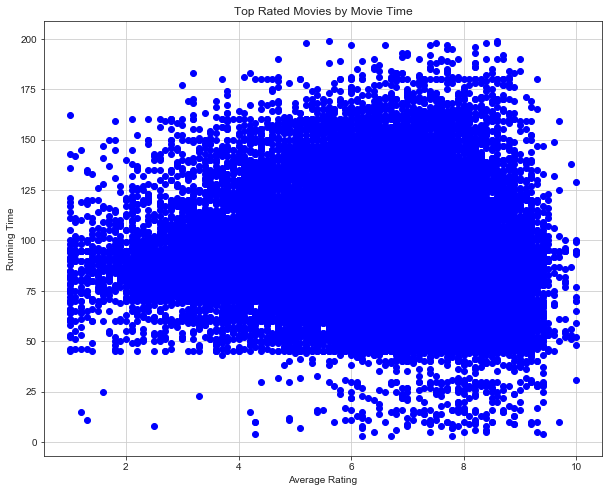

In [1148]:
x = movie_rating.averagerating
y = movie_rating.runtime_minutes
plt.figure(figsize = (10,8))
plt.scatter(x,y, color = 'Blue')
plt.title('Top Rated Movies by Movie Time')
plt.xlabel('Average Rating')
plt.ylabel('Running Time')
plt.grid()


In [1292]:
#DROPPED RUNTIME OUTLIERS

movie_rating = joined_imdb.loc[joined_imdb['runtime_minutes'] < 200]
movie_rating

,averagerating,numvotes,primary_title,runtime_minutes,genres
tconst,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,117.000000,Romance
tt10384606,8.9,559,Borderless,87.000000,Documentary
tt1042974,6.4,20,Just Inès,90.000000,Drama
tt1043726,4.2,50352,The Legend of Hercules,99.000000,"Action,Adventure,Fantasy"
tt1060240,6.5,21,Até Onde?,73.000000,"Mystery,Thriller"
...,...,...,...,...,...
tt9805820,8.1,25,Caisa,84.000000,Documentary
tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,120.000000,"Action,Animation,Sci-Fi"
tt9851050,4.7,14,Sisters,94.732273,"Action,Drama"


Text(0.5, 0, 'rating')

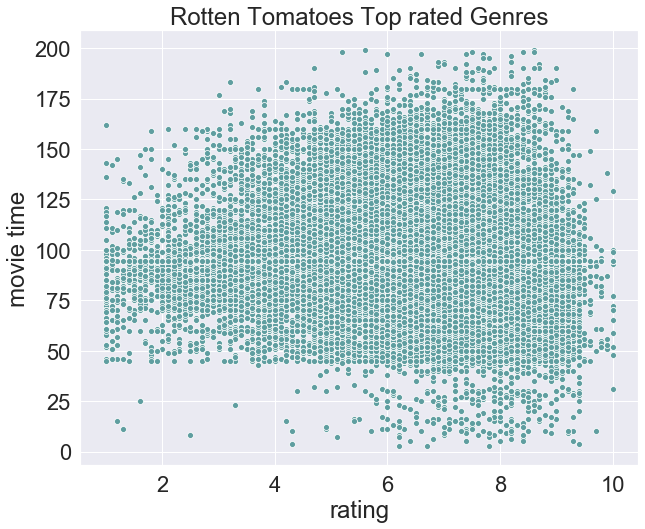

In [1441]:
x = movie_rating.averagerating
y= movie_rating.runtime_minutes
plt.figure(figsize=(10,8))
sns.scatterplot(x, y, color = 'cadetblue')
plt.title('Rotten Tomatoes Top rated Genres')
plt.ylabel('movie time')
sns.set(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=2)
plt.xlabel('rating')

In [ ]:
#movie_rating = joined_imdb.loc[joined_imdb['runtime_minutes'] < 200]

In [1345]:
top_rated = joined_imdb.loc[joined_imdb['averagerating'] > 7]
top_rated.genres.value_counts().head(10)

Documentary                      6444
Drama                            3640
Comedy                           1108
Comedy,Drama                      728
Documentary,Music                 414
Biography,Documentary             411
Drama,Romance                     385
Documentary,Drama                 374
Biography,Documentary,History     335
Documentary,History               320
Name: genres, dtype: int64

Text(0.5, 0, 'Number of Movies')

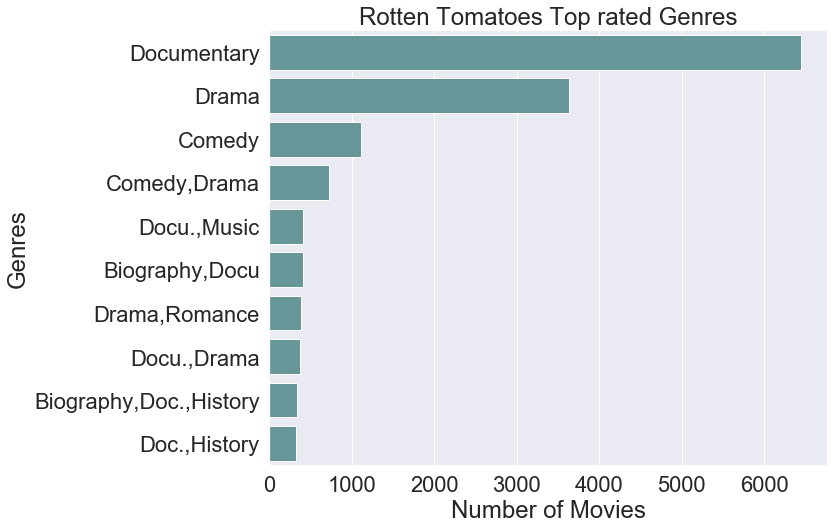

In [1437]:
y = ['Documentary', 'Drama', 'Comedy', 'Comedy,Drama', 'Docu.,Music', 'Biography,Docu','Drama,Romance',
    'Docu.,Drama', 'Biography,Doc.,History', 'Doc.,History']

x = [6444, 3640, 1108, 728, 414, 411, 385, 374, 335, 320]

plt.figure(figsize=(10,8))
sns.barplot(x, y, color = 'cadetblue')
plt.title('Rotten Tomatoes Top rated Genres')
plt.ylabel('Genres')
sns.set(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=2)
plt.xlabel('Number of Movies')

In [942]:
#top_critic1 if critic is a 'top critic', 0 otherwise
#The critics upload their reviews to the movie page on the website, and need to mark their review "fresh" 
#if it's generally favorable or "rotten" otherwise.

rotten_ratings = pd.read_csv('rt.reviews.tsv', sep= '\t', encoding = 'unicode_escape')
rotten_ratings

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [943]:
#Dropping THE CRITIC NAME COLUMN
rotten_ratings.drop(['critic', 'review', 'publisher'], axis=1, inplace = True)

In [944]:
rotten_ratings.dropna(subset = ['rating'], axis = 0, inplace = True)


In [945]:

rotten_ratings.isna().any()

id            False
rating        False
fresh         False
top_critic    False
date          False
dtype: bool

In [946]:
rotten_movies = pd.read_csv('rt.movie_info.tsv', sep= '\t')
rotten_movies.head(2)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [947]:
#dropping columns not necessary for data analysis

rotten_movies.drop(['synopsis', 'dvd_date', 'writer', 'theater_date','currency', 'box_office', 'director', 'studio', 'rating'],  axis = 1, inplace = True)

In [948]:


rotten_movies

,id,genre,runtime
0,1,Action and Adventure|Classics|Drama,104 minutes
1,3,Drama|Science Fiction and Fantasy,108 minutes
2,5,Drama|Musical and Performing Arts,116 minutes
3,6,Drama|Mystery and Suspense,128 minutes
4,7,Drama|Romance,200 minutes
...,...,...,...
1555,1996,Action and Adventure|Horror|Mystery and Suspense,106 minutes
1556,1997,Comedy|Science Fiction and Fantasy,88 minutes
1557,1998,Classics|Comedy|Drama|Musical and Performing Arts,111 minutes
1558,1999,Comedy|Drama|Kids and Family|Sports and Fitness,101 minutes


In [949]:
rotten_movies.dropna(inplace = True)

In [950]:
#joined_imdb = imdb_ratings.set_index('tconst').join(imdb_title.set_index('tconst'), on = 'tconst', how = 'inner')
#joined_imdb.head()

In [951]:
joined_rotten = rotten_movies.join(rotten_ratings, on = 'id', how = 'inner', lsuffix = 'id')
joined_rotten.head(2)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,C,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2/5,rotten,0,"April 21, 2013"


In [953]:
joined_rotten.isna().sum()

idid          0
genre         0
runtime       0
id            0
rating        0
fresh         0
top_critic    0
date          0
dtype: int64

In [1126]:
joined_rotten.drop('id', axis=1, inplace = True)

In [1127]:
joined_rotten.head()

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200,2,rotten,0,"April 21, 2013"
7,13,Drama,123,3,fresh,0,"January 7, 2013"
8,14,Drama,117,3,fresh,0,"October 20, 2012"
9,15,Action and Adventure|Mystery and Suspense|Scie...,108,3,fresh,0,"September 27, 2012"


In [957]:
def change_rating(df):
    for strings in df:
        df.replace('A', 5, regex = True, inplace=True)

In [958]:
change_rating(joined_rotten.rating)
joined_rotten.head()

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,C,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2/5,rotten,0,"April 21, 2013"
7,13,Drama,123 minutes,3,B,fresh,0,"January 7, 2013"
8,14,Drama,117 minutes,3,3/4,fresh,0,"October 20, 2012"
9,15,Action and Adventure|Mystery and Suspense|Scie...,108 minutes,3,3/5,fresh,0,"September 27, 2012"


In [959]:
def change_rating1(df):
    for strings in df:
        df.replace('B', 3, regex = True, inplace=True)

In [960]:
change_rating1(joined_rotten.rating)
joined_rotten.head()

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,C,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2/5,rotten,0,"April 21, 2013"
7,13,Drama,123 minutes,3,3,fresh,0,"January 7, 2013"
8,14,Drama,117 minutes,3,3/4,fresh,0,"October 20, 2012"
9,15,Action and Adventure|Mystery and Suspense|Scie...,108 minutes,3,3/5,fresh,0,"September 27, 2012"


In [961]:
def change_rating2(df):
    for strings in df:
        df.replace('C', 2, regex = True, inplace=True)

In [962]:
change_rating2(joined_rotten.rating)
joined_rotten.head()

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2/5,rotten,0,"April 21, 2013"
7,13,Drama,123 minutes,3,3,fresh,0,"January 7, 2013"
8,14,Drama,117 minutes,3,3/4,fresh,0,"October 20, 2012"
9,15,Action and Adventure|Mystery and Suspense|Scie...,108 minutes,3,3/5,fresh,0,"September 27, 2012"


In [963]:
#sns.scatterplot(x='fresh', y='runtime', dat = joined_rotten)

In [964]:
def change_rating3(df):
    for strings in df:
        df.replace('D', 1, regex = True, inplace=True)

In [965]:
def change_rating4(df):
    for strings in df:
        df.replace('F', 0, regex = True, inplace=True)

In [966]:
change_rating4(joined_rotten.rating)
joined_rotten.head(2)


,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2/5,rotten,0,"April 21, 2013"


In [967]:
def change_rating5(df):
    for strings in df:
        df.replace('1/5', 1, regex = True, inplace=True)

In [968]:
change_rating5(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2/5,rotten,0,"April 21, 2013"


In [969]:
def change_rating6(df):
    for strings in df:
        df.replace('2/5', 2, regex = True, inplace=True)

In [970]:
change_rating6(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2,rotten,0,"April 21, 2013"


In [971]:
def change_rating7(df):
    for strings in df:
        df.replace('3/5', 3, regex = True, inplace=True)

In [972]:
change_rating7(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2,rotten,0,"April 21, 2013"


In [973]:
def change_rating10(df):
    for strings in df:
        df.replace('3/4', 3, regex = True, inplace=True)

In [974]:
change_rating10(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2,rotten,0,"April 21, 2013"


In [975]:
def change_rating8(df):
    for strings in df:
        df.replace('4/5', 4, regex = True, inplace=True)

In [976]:
change_rating8(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2,rotten,0,"April 21, 2013"


In [977]:
def change_rating8(df):
    for strings in df:
        df.replace('5/5', 5, regex = True, inplace=True)

In [978]:
change_rating8(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2,rotten,0,"April 21, 2013"


In [979]:
def change_rating11(df):
    for strings in df:
        df.replace('4/4', 5, regex = True, inplace=True)

In [980]:
def change_rating13(df):
    for strings in df:
        df.replace('2.5/4', 2.5, regex = True, inplace=True)
    

In [981]:
def change_rating14(df):
    for strings in df:
        df.replace('2.0/5', 2, regex = True, inplace=True)
    

In [982]:
change_rating14(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [983]:
def change_rating16(df):
    for strings in df:
        df.replace('1/4', 1, regex = True, inplace=True)

In [984]:
change_rating16(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [985]:
def change_rating15(df):
    for strings in df:
        df.replace('3.5/4', 4, regex = True, inplace=True)

In [986]:
change_rating15(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [987]:
change_rating13(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2,rotten,0,"April 21, 2013"


In [988]:
def change_rating17(df):
    for strings in df:
        df.replace('2/4', 2, regex = True, inplace=True)

In [989]:
change_rating17(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2,rotten,0,"April 21, 2013"


In [990]:
def change_rating18(df):
    for strings in df:
        df.replace('1.5/4', 1, regex = True, inplace=True)

In [991]:
change_rating18(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2,rotten,0,"April 21, 2013"


In [992]:
def change_rating19(df):
    for strings in df:
        df.replace('8/10', 4, regex = True, inplace=True)

In [993]:
def change_rating20(df):
    for strings in df:
        df.replace('9/10', 4.5, regex = True, inplace=True)

In [994]:
change_rating20(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [995]:
def change_rating21(df):
    for strings in df:
        df.replace('6/10', 3, regex = True, inplace=True)

In [996]:
change_rating21(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [997]:
def change_rating22(df):
    for strings in df:
        df.replace('7/10', 3.5, regex = True, inplace=True)

In [998]:
change_rating22(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [999]:
def change_rating23(df):
    for strings in df:
        df.replace('4/10', 2, regex = True, inplace=True)

In [1000]:
change_rating23(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1001]:
def change_rating24(df):
    for strings in df:
        df.replace('5/10', 2.5, regex = True, inplace=True)

In [1002]:
change_rating24(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1003]:
def change_rating25(df):
    for strings in df:
        df.replace('3/10', 1.5, regex = True, inplace=True)

In [1004]:
change_rating25(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1005]:
def change_rating26(df):
    for strings in df:
        df.replace('0/5', 0, regex = True, inplace=True)

In [1006]:
change_rating26(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1007]:
def change_rating27(df):
    for strings in df:
        df.replace('0.5/5', 0, regex = True, inplace=True)

In [1008]:
change_rating27(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1009]:
def change_rating28(df):
    for strings in df:
        df.replace('0.5/4', 0, regex = True, inplace=True)

In [1010]:
change_rating28(joined_rotten.rating)
joined_rotten.head(1)


,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1011]:
def change_rating29(df):
    for strings in df:
        df.replace('2/10', 1, regex = True, inplace=True)

In [1012]:
change_rating29(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1013]:
def change_rating30(df):
    for strings in df:
        df.replace('1/10', 0.5, regex = True, inplace=True)

In [1014]:
change_rating30(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1015]:
def change_rating31(df):
    for strings in df:
        df.replace('4.0/4', 4, regex = True, inplace=True)

In [1016]:
change_rating31(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1017]:
def change_rating32(df):
    for strings in df:
        df.replace('2.5', 2.5, regex = True, inplace=True)

In [1018]:
change_rating32(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1019]:
def change_rating33(df):
    for strings in df:
        df.replace('3.7/5', 3.7, regex = True, inplace=True)

In [1020]:
change_rating33(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1021]:
def change_rating34(df):
    for strings in df:
        df.replace('0/4', 0, regex = True, inplace=True)

In [1022]:
change_rating34(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1023]:
def change_rating35(df):
    for strings in df:
        df.replace('7.7', 3.3, regex = True, inplace=True)

In [1024]:
change_rating35(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1028]:
def change_rating36(df):
    for strings in df:
        df.replace('D+', 1, regex = True, inplace=True)

In [1029]:
change_rating36(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1025]:
change_rating19(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"


In [1026]:
change_rating11(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,id,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,3,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,3,2,rotten,0,"April 21, 2013"


In [1034]:
joined_rotten['rating'] = joined_rotten.rating.astype(int)

In [1035]:
joined_rotten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 3 to 1559
Data columns (total 8 columns):
idid          1135 non-null int64
genre         1135 non-null object
runtime       1135 non-null object
id            1135 non-null int64
rating        1135 non-null int64
fresh         1135 non-null object
top_critic    1135 non-null int64
date          1135 non-null object
dtypes: int64(4), object(4)
memory usage: 79.8+ KB


In [ ]:
change_rating3(joined_rotten.rating)
joined_rotten.head()

In [1037]:
def remove_format(df):
    for strings in df:
        df.replace('minutes', '', regex = True, inplace=True)

In [1038]:
remove_format(joined_rotten.runtime)

In [1040]:
joined_rotten['runtime'] = joined_rotten.runtime.astype(int)

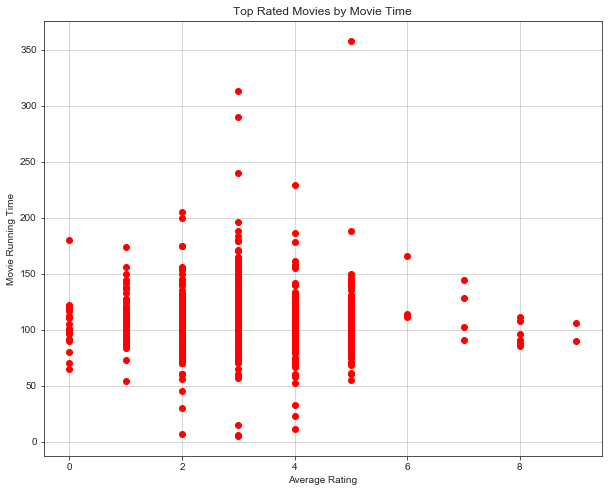

In [1300]:
plt.figure(figsize = (10,8))
plt.scatter(joined_rotten.rating, joined_rotten.runtime, color='red')
plt.title('Top Rated Movies by Movie Time')
plt.xlabel('Average Rating')
plt.ylabel('Movie Running Time')
plt.grid()

 

In [1442]:
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128,2,rotten,0,"July 17, 2013"


/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:879: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  scout = ax.scatter([], [], **kws)


Text(0.5, 0, 'Movie Rating')

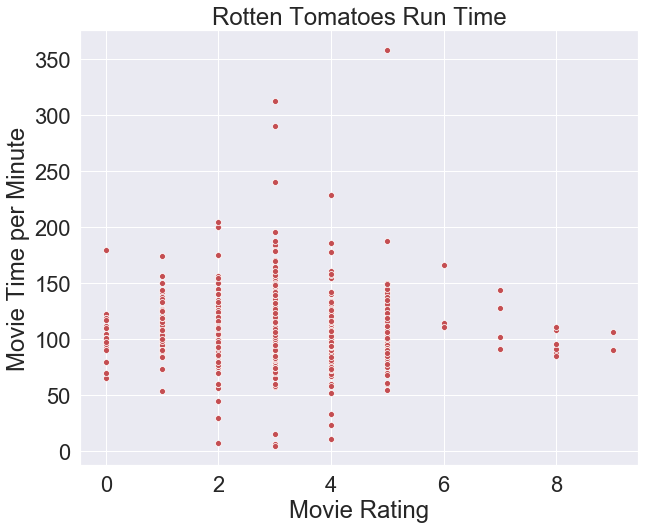

In [1447]:
x = joined_rotten.rating
y= joined_rotten.runtime
plt.figure(figsize=(10,8))
sns.scatterplot(x, y, color = 'R')
plt.title('Rotten Tomatoes Run Time')
plt.ylabel('Movie Time per Minute')
sns.set(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=2)
plt.xlabel('Movie Rating')

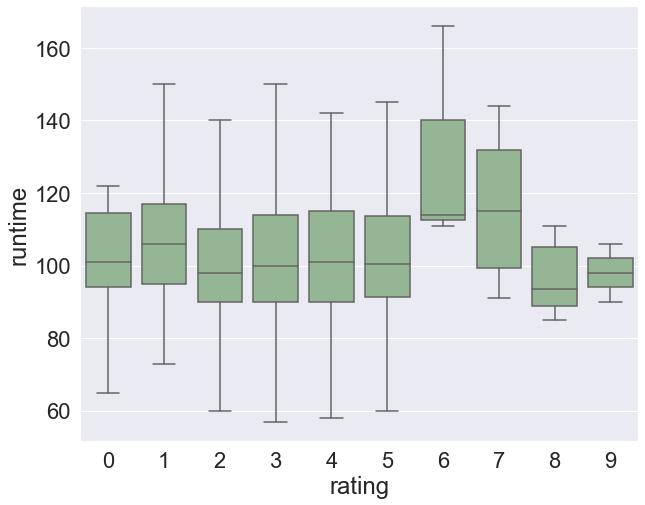

In [1458]:
plt.figure(figsize=(10,8))
sns.boxplot(x='rating', y = 'runtime', data=joined_rotten, 
showfliers  = False, color='darkseagreen')

In [1466]:
joined_rotten.head()

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200,2,rotten,0,"April 21, 2013"
7,13,Drama,123,3,fresh,0,"January 7, 2013"
8,14,Drama,117,3,fresh,0,"October 20, 2012"
9,15,Action and Adventure|Mystery and Suspense|Scie...,108,3,fresh,0,"September 27, 2012"


In [1484]:
joined_rotten.runtime.describe()

count    1135.000000
mean      104.053744
std        24.906947
min         5.000000
25%        91.000000
50%       100.000000
75%       114.000000
max       358.000000
Name: runtime, dtype: float64

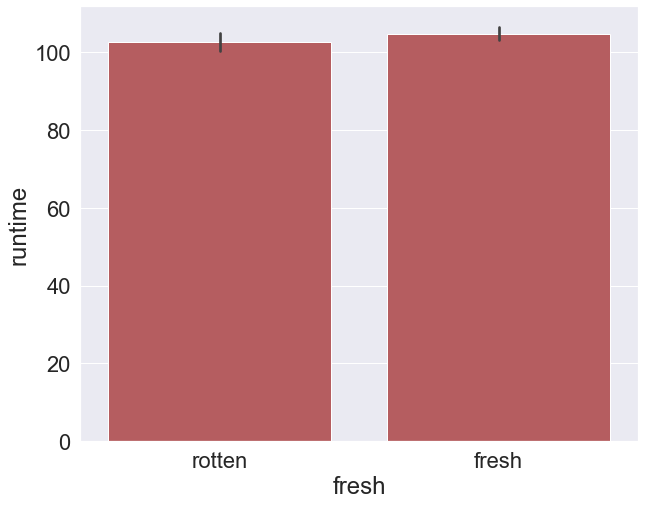

In [1483]:
plt.figure(figsize=(10,8))
sns.barplot(x='fresh', y= 'runtime', data=joined_rotten, 
 color='r')
sns.set(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=2)

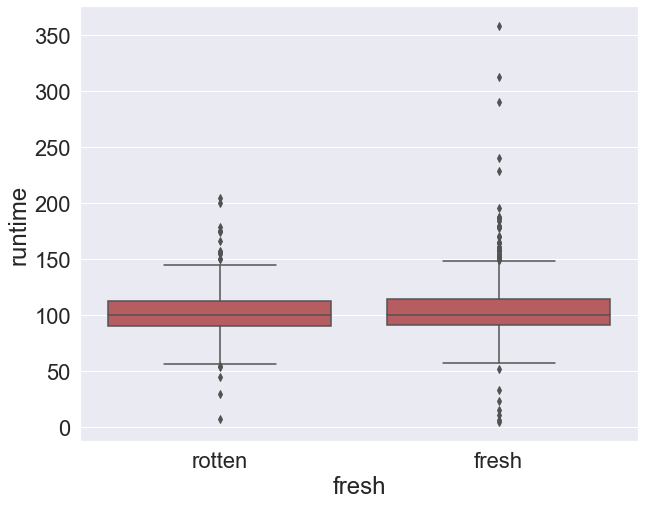

In [1492]:
plt.figure(figsize=(10,8))
sns.boxplot(x='fresh', y = 'runtime', data=joined_rotten, 
 color='r')

In [1266]:
u = str(set(list(joined_rotten['genre'])))
u.count('Action')

83

In [1267]:
u = str(set(list(joined_rotten['genre'])))
u.count('Drama')

121

In [1268]:
u = str(set(list(joined_rotten['genre'])))
u.count('Comedy')

91

In [1302]:
u = str(set(list(joined_rotten['genre'])))
u.count('Romance')

44

In [1303]:
u = str(set(list(joined_rotten['genre'])))
u.count('Adventure')

83

In [1304]:
u = str(set(list(joined_rotten['genre'])))
u.count('Fantasy')

61

In [1305]:
u = str(set(list(joined_rotten['genre'])))
u.count('Suspense')

62

In [1306]:
u = str(set(list(joined_rotten['genre'])))
u.count('Science Fiction')

61

In [1307]:
u = str(set(list(joined_rotten['genre'])))
u.count('Mystery')

62

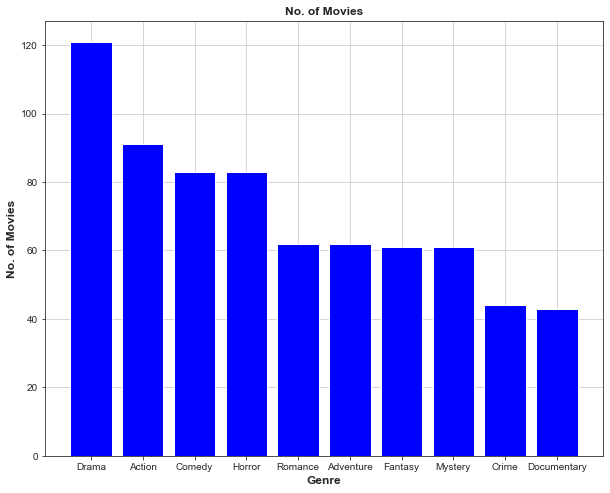

In [1336]:
x = [ 'Drama', 'Action', 'Comedy', 'Horror', 'Romance', 'Adventure','Fantasy', 'Mystery', 'Crime','Documentary'] 
y = [121, 91, 83, 83, 62, 62, 61, 61, 44, 43]
plt.figure(figsize = (10,8)) 
plt.bar(x,y, color = 'blue') 
plt.title('Top Rated Genres') 
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.xlabel('Genre', weight='bold',
          size = 'larger')
plt.ylabel('No. of Movies',  weight='bold',
          size = 'larger') 
plt.title('No. of Movies',  weight='bold',
          size = 'larger') 
plt.grid() 

x = [ 'Drama', 'Action', 'Comedy', 'Horror', 'Romance', 'Adventure','Fantasy', 'Comedy', 'Crime','Documentary']
y = [121, 91, 83, 83, 62, 62, 61, 61, 44, 43]
plt.figure(figsize = (20,10))
plt.bar(x,y, color = 'blue')
plt.title('Top Rated Genres')
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
plt.xlabel('Genre')
plt.ylabel('No. of Movies')
plt.grid()
plt.show()


In [ ]:
plt.hist()